# Custom CNN Model from Scratch

# Importing necessary Modules and Libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Mounting Drive to read Folders hosted on it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading all 4 sub Folders inside Train Balanced Dataset which was obtained by EDA

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/train_balanced_dataset',i)
    for j in tqdm.tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


100%|██████████| 1321/1321 [00:26<00:00, 50.29it/s] 


# Shuffling data in X_train and Y_train for better learning for the Model

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(5284, 150, 150, 3)

In [ ]:
Y_train.shape

(5284,)

# Splitting so that Training Data is around 90% and Validation Data is around 10%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Converting Y_train and Y_test data from strings to integer and then converting them to One Hot Encoding

In [ ]:
y_train_new=[]
for i in y_train:
  y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
  y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

# Initiating the Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Checking the Model Params and summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model with Adam optimizer and for categorical_crossentrophy loss

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Fitting the Model with Data

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.1)

Epoch 1/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.2769 - loss: 2.9227 - val_accuracy: 0.4874 - val_loss: 1.1984
Epoch 2/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.5918 - loss: 0.9546 - val_accuracy: 0.6702 - val_loss: 0.7982
Epoch 3/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7315 - loss: 0.6596 - val_accuracy: 0.6618 - val_loss: 0.7677
Epoch 4/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.7971 - loss: 0.5179 - val_accuracy: 0.7983 - val_loss: 0.4823
Epoch 5/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.8225 - loss: 0.4504 - val_accuracy: 0.8361 - val_loss: 0.4131
Epoch 6/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8793 - loss: 0.3394 - val_accuracy: 0.8340 - val_loss: 0.4641
Epoch 7/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9011 - loss: 0.2932 - val_accuracy: 0.8298 - val_loss: 0.4339
Epoch 8/25
134/134 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9049 - loss: 0.2808 -

# Saving the Model in .h5 file for retrieving later whenever required

In [ ]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_model.h5')

In [ ]:
# model is already loaded, to reload it
# from tensorflow.keras.models import load_model
# model = load_model("brain_tumor_model.h5")

# Plotting for visualization of Training and Validation Accuracy and Loss wrt epochs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

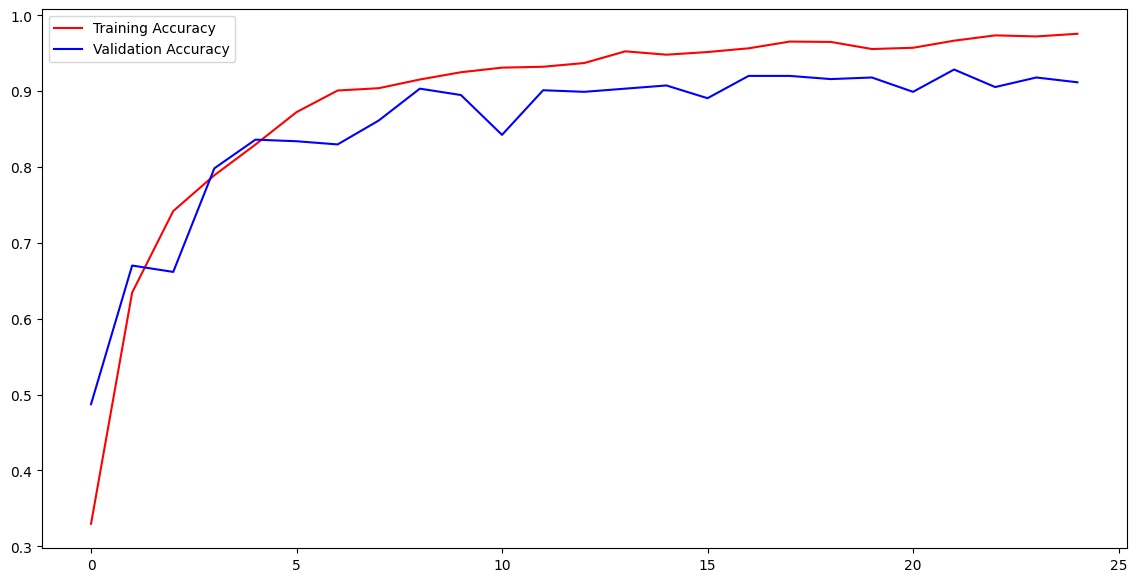

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

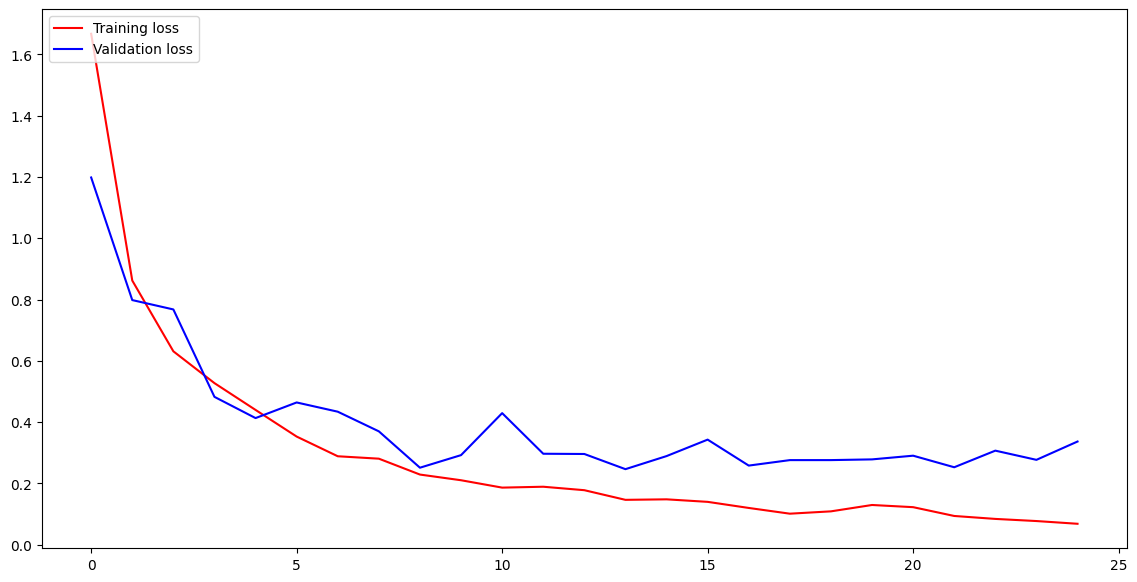

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# Predicting a single Image to check the Model

In [ ]:
img = cv2.imread('/content/drive/MyDrive/brain_tumor_dataset/Testing/pituitary/Te-pi_0013.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

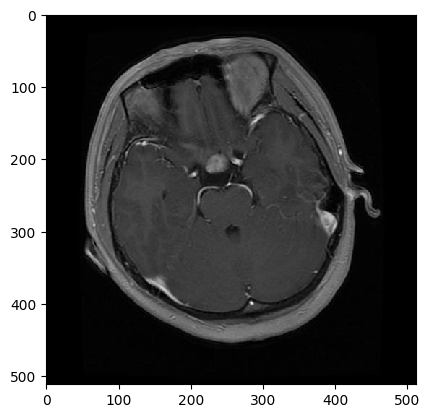

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor_dataset/Testing/pituitary/Te-pi_0013.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
print(indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1


# Prediction Demo with Gradio Framework

Before launching the Gradio Framework, first reset the gradio by running following cell

In [ ]:
import gradio as gr
gr.close_all()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Necessary Imports if you are running the notebook from here and not from start for inference

In [ ]:
from tensorflow.keras.models import load_model

# Load the Model (brain_tumor_model.h5) for Custom_CNN model prediction

In [ ]:
# Custom CNN (load the Model if not)
model = load_model('/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_model.h5')

# Run the below cell once more (If previous cells are not run and you are directly doing prediction )

In [ ]:
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Now run the Final Code to launch Gradio Framework

In [ ]:
import cv2
import numpy as np
import gradio as gr


IMG_SIZE = 150  # because your dataset uses (150,150)

def predict_brain_mri(img):
    # 1. Resize the image exactly like in training
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    reshaped_img = img_resized.reshape(1, image_size, image_size, 3)


    # 2. Get model predictions
    preds = model.predict(reshaped_img)[0]   # shape: (4,)

    # 3. Build class → probability dictionary
    probs = {labels[i]: float(preds[i]) for i in range(len(labels))}

    return probs

# ---- Gradio Interface ----
iface = gr.Interface(
    fn=predict_brain_mri,
    inputs=gr.Image(type="numpy", label="Upload Brain MRI"),
    outputs=gr.Label(num_top_classes=4, label="Predicted class"),
    title="Brain MRI Tumor Classifier",
    description="Upload an MRI image to classify as glioma / meningioma / notumor / pituitary."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://10f1569ec6dd7f7666.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# ResNet50 Classifer

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
X_train = []
Y_train = []
image_size = 224   # ResNet50 default input size (224,224)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

data_path = "/content/drive/MyDrive/brain_tumor_dataset/train_balanced_dataset"

for label in labels:
    folder = os.path.join(data_path, label)
    print(f"Loading images for: {label}")

    for img_name in tqdm.tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)

        img = cv2.resize(img, (image_size, image_size))
        img = preprocess_input(img)  # IMPORTANT for ResNet50

        X_train.append(img)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)


Loading images for: glioma


100%|██████████| 1321/1321 [00:25<00:00, 51.24it/s] 


Loading images for: meningioma


100%|██████████| 1321/1321 [00:22<00:00, 58.61it/s] 


Loading images for: notumor


100%|██████████| 1321/1321 [00:23<00:00, 55.37it/s] 


Loading images for: pituitary


100%|██████████| 1321/1321 [00:23<00:00, 55.55it/s] 


X_train shape: (5284, 224, 224, 3)
Y_train shape: (5284,)


In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=101
)

print(X_train.shape, X_test.shape)


(4755, 224, 224, 3) (529, 224, 224, 3)


In [ ]:
# String → integer
y_train_int = [labels.index(i) for i in y_train]
y_test_int  = [labels.index(i) for i in y_test]

# Integer → one-hot
y_train = tf.keras.utils.to_categorical(y_train_int, num_classes=4)
y_test  = tf.keras.utils.to_categorical(y_test_int, num_classes=4)


In [ ]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(image_size, image_size, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
output = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,145,668 (92.11 MB)

 Trainable params: 557,956 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.1,
    batch_size=32
)


Epoch 1/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 43s 203ms/step - accuracy: 0.6078 - loss: 1.0021 - val_accuracy: 0.8634 - val_loss: 0.3701
Epoch 2/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.8440 - loss: 0.4198 - val_accuracy: 0.8655 - val_loss: 0.3333
Epoch 3/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.8557 - loss: 0.3632 - val_accuracy: 0.8929 - val_loss: 0.2940
Epoch 4/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.8897 - loss: 0.3062 - val_accuracy: 0.8908 - val_loss: 0.2913
Epoch 5/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9009 - loss: 0.2574 - val_accuracy: 0.8992 - val_loss: 0.2689
Epoch 6/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9058 - loss: 0.2480 - val_accuracy: 0.8929 - val_loss: 0.3113
Epoch 7/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.9110 - loss: 0.2297 - val_accuracy: 0.9097 - val_loss: 0.2506
Epoch 8/20
134/134 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9262 - loss: 0.2014 -

In [ ]:
model.save("/content/drive/MyDrive/brain_tumor_dataset/resnet50_brain_tumor_model.h5")


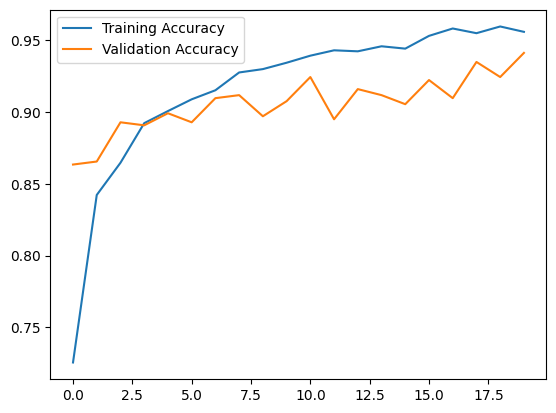

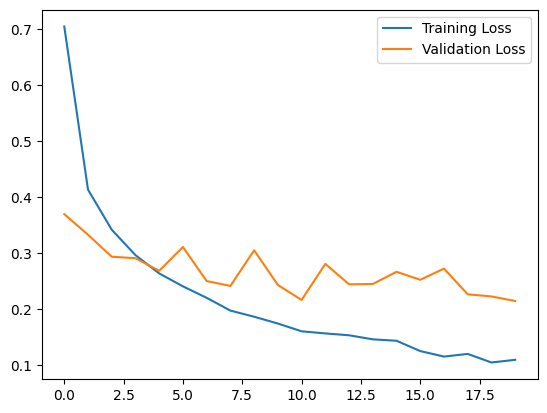

In [ ]:
# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
def prepare_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)
    img = img.reshape(1, image_size, image_size, 3)
    return img


In [ ]:
img_path = "/content/drive/MyDrive/brain_tumor_dataset/Testing/pituitary/Te-pi_0013.jpg"
img = prepare_image(img_path)

pred = model.predict(img)[0]  # take probability vector
print("Raw probabilities:", pred)

class_index = np.argmax(pred)
print("Predicted Class:", labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Raw probabilities: [9.9676883e-01 1.6522412e-03 1.7744261e-04 1.4015612e-03]
Predicted Class: glioma


# ResNet50 Model Prediction using Gradio Framework (Necessary steps if you are running the notebook from here)

# If Gradio giving error please delete and restart runtime and run the below cell

In [ ]:
import gradio as gr
gr.close_all()

# Mount the Google Drive if Model is saved in Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Necessary imports if you are running directly from here and not from start of the Notebook

In [ ]:
import cv2
from tensorflow.keras.models import load_model
from keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the ResNet50 Model (resnet50_brain_tumor_model.h5)

In [ ]:
model = load_model('/content/drive/MyDrive/brain_tumor_dataset/resnet50_brain_tumor_model.h5')

In [ ]:
image_size = 224   # ResNet50 default input size (224,224)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
import gradio as gr

def predict_brain_mri(img):
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)
    img = img.reshape(1, image_size, image_size, 3)

    preds = model.predict(img)[0]

    probs = {labels[i]: float(preds[i]) for i in range(len(labels))}
    return probs

iface = gr.Interface(
    fn=predict_brain_mri,
    inputs=gr.Image(type="numpy", label="Upload MRI"),
    outputs=gr.Label(num_top_classes=4, label="Prediction"),
    title="ResNet50 Brain Tumor Classifier",
    description="Upload a brain MRI to classify tumor type using ResNet50."
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c29329e11109dea503.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c29329e11109dea503.gradio.live


# Comparison between Custom_CNN and ResNet50 model on Brain Tumor Detection

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train_cnn = []
Y_train_cnn = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/train_balanced_dataset',i)
    for j in tqdm.tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train_cnn.append(img)
        Y_train_cnn.append(i)

X_train_cnn = np.array(X_train_cnn)
Y_train_cnn = np.array(Y_train_cnn)

print("X_train_cnn shape:", X_train_cnn.shape)
print("Y_train_cnn shape:", Y_train_cnn.shape)


100%|██████████| 1321/1321 [00:34<00:00, 38.58it/s] 


X_train_cnn shape: (5284, 150, 150, 3)
Y_train_cnn shape: (5284,)


In [ ]:
X_train_res = []
Y_train_res = []
image_size = 224   # ResNet50 default input size (224,224)
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

data_path = "/content/drive/MyDrive/brain_tumor_dataset/train_balanced_dataset"

for label in labels:
    folder = os.path.join(data_path, label)
    print(f"Loading images for: {label}")

    for img_name in tqdm.tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)

        img = cv2.resize(img, (image_size, image_size))
        img = preprocess_input(img)  # IMPORTANT for ResNet50

        X_train_res.append(img)
        Y_train_res.append(label)

X_train_res = np.array(X_train_res)
Y_train_res = np.array(Y_train_res)

print("X_train_res shape:", X_train_res.shape)
print("Y_train_res shape:", Y_train_res.shape)

Loading images for: glioma


100%|██████████| 1321/1321 [00:24<00:00, 53.66it/s] 


Loading images for: meningioma


100%|██████████| 1321/1321 [00:20<00:00, 64.52it/s]


Loading images for: notumor


100%|██████████| 1321/1321 [00:23<00:00, 57.15it/s] 


Loading images for: pituitary


100%|██████████| 1321/1321 [00:22<00:00, 58.38it/s]


X_train_res shape: (5284, 224, 224, 3)
Y_train_res shape: (5284,)


In [ ]:
X_train_cnn, Y_train_cnn = shuffle(X_train_cnn, Y_train_cnn, random_state=101)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_train_cnn, Y_train_cnn, test_size=0.1, random_state=101
)

print(X_train_cnn.shape, X_test_cnn.shape)


(4755, 150, 150, 3) (529, 150, 150, 3)


In [ ]:
X_train_res, Y_train_res = shuffle(X_train_res, Y_train_res, random_state=101)

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_train_res, Y_train_res, test_size=0.1, random_state=101
)

print(X_train_res.shape, X_test_res.shape)


(4755, 224, 224, 3) (529, 224, 224, 3)


In [ ]:
# String → integer
y_train_int_cnn = [labels.index(i) for i in y_train_cnn]
y_test_int_cnn  = [labels.index(i) for i in y_test_cnn]

# Integer → one-hot
y_train_cnn = tf.keras.utils.to_categorical(y_train_int_cnn, num_classes=4)
y_test_cnn = tf.keras.utils.to_categorical(y_test_int_cnn, num_classes=4)


In [ ]:
# String → integer
y_train_int_res = [labels.index(i) for i in y_train_res]
y_test_int_res  = [labels.index(i) for i in y_test_res]

# Integer → one-hot
y_train_res = tf.keras.utils.to_categorical(y_train_int_res, num_classes=4)
y_test_res  = tf.keras.utils.to_categorical(y_test_int_res, num_classes=4)


In [ ]:
import numpy as np

# y_test is one-hot: shape (N, 4)
y_true_cnn = np.argmax(y_test_cnn, axis=1)   # shape (N,)


In [ ]:
import numpy as np

# y_test is one-hot: shape (N, 4)
y_true_res = np.argmax(y_test_res, axis=1)   # shape (N,)


# Loading both the Models for Evaluating and Plotting Metrics

In [ ]:
from tensorflow.keras.models import load_model

# Custom CNN
cnn_model = load_model('/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_model.h5')

# ResNet50
resnet_model = load_model('/content/drive/MyDrive/brain_tumor_dataset/resnet50_brain_tumor_model.h5')


In [ ]:
# Custom CNN predictions
cnn_probs = cnn_model.predict(X_test_cnn)          # shape (N, 4)
cnn_pred  = np.argmax(cnn_probs, axis=1)       # integer labels

# ResNet50 predictions
resnet_probs = resnet_model.predict(X_test_res)    # shape (N, 4)
resnet_pred  = np.argmax(resnet_probs, axis=1)


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("=== Custom CNN ===")
print("Accuracy:", accuracy_score(y_true_cnn, cnn_pred))
print("\nClassification Report:\n")
print(classification_report(y_true_cnn, cnn_pred, target_names=labels))

print("\n\n=== ResNet50 ===")
print("Accuracy:", accuracy_score(y_true_res, resnet_pred))
print("\nClassification Report:\n")
print(classification_report(y_true_res, resnet_pred, target_names=labels))


=== Custom CNN ===
Accuracy: 0.9111531190926276

Classification Report:

              precision    recall  f1-score   support

      glioma       0.98      0.81      0.88       151
  meningioma       0.77      0.94      0.84       124
     notumor       0.97      0.99      0.98       121
   pituitary       0.96      0.93      0.95       133

    accuracy                           0.91       529
   macro avg       0.92      0.92      0.91       529
weighted avg       0.92      0.91      0.91       529



=== ResNet50 ===
Accuracy: 0.9357277882797732

Classification Report:

              precision    recall  f1-score   support

      glioma       0.93      0.94      0.93       151
  meningioma       0.88      0.87      0.87       124
     notumor       0.96      0.99      0.98       121
   pituitary       0.98      0.94      0.96       133

    accuracy                           0.94       529
   macro avg       0.94      0.94      0.94       529
weighted avg       0.94      0.94      

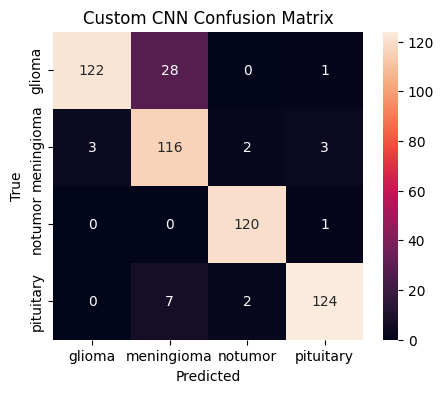

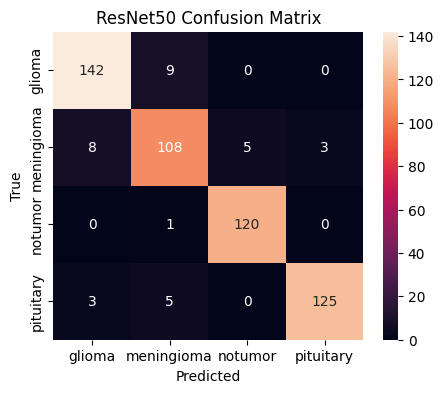

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_mat(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

plot_conf_mat(y_true_cnn, cnn_pred, "Custom CNN Confusion Matrix")
plot_conf_mat(y_true_res, resnet_pred, "ResNet50 Confusion Matrix")


In [ ]:
import pandas as pd

cnn_acc    = accuracy_score(y_true_cnn, cnn_pred)
resnet_acc = accuracy_score(y_true_res, resnet_pred)

comparison_df = pd.DataFrame({
    "Model": ["Custom CNN", "ResNet50"],
    "Accuracy": [cnn_acc, resnet_acc]
})

display(comparison_df)


,Model,Accuracy
0,Custom CNN,0.911153
1,ResNet50,0.935728
